# TISAFE.
Este CSV contiene datos sobre ciberataques, incluyendo información como la fecha, el país de origen, el tipo de ataque, la industria afectada y una puntuación de riesgo. Estos datos se utilizan para analizar tendencias y patrones en incidentes de ciberseguridad a nivel global


### Importación de librerias.

In [550]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

### Importación e información del dataframe

In [551]:
df = pd.read_csv('data/TISAFE.csv', index_col=0) #tomamos la primera columna como índice
df.head()

,date,year,source_database,origin,attack_vector,attack_description,country,industry_type,subcategory,attack_details,ti_safe_score,impact,link_at_the_internet
id,,,,,,,,,,,,,
1338,15/08/2025,2024,TI Safe,External,Ransomware attack,A massive cyberattack disrupted Iran's Central...,Iran,Financial,Banking and Finance,The Central Bank of Iran suffered a major cybe...,4.0,"Severe disruptions in Iran's banking system, w...",<a href='https://www.israelhayom.com/2024/08/1...
1337,15/08/2024,2024,TI Safe,External,Phishing attack,"A previously unknown threat actor, dubbed Acto...",Azerbaijan and Israel,Public Services,"Gpver,emt","In July 2024, a newly identified threat actor,...",4.0,Compromise of sensitive diplomatic data throug...,<a href='https://thehackernews.com/2024/08/new...
1336,15/08/2024,2024,TI Safe,External,Cyberattack,The Iranian state-backed group APT42 launched ...,United States (and Israel),Public Services,Government and Elections,"Between February and late July 2024, APT42, a ...",4.0,Successful breaches of accounts across multipl...,<a href='https://cybersecuritynews.com/iranian...
1335,14/08/2024,2024,TI Safe,External,Ransomware attack,The ThreeAM ransomware targeted Kootenai Healt...,United States,Health and Homecare services,Healthcare,"The ThreeAM ransomware attack, which began on ...",4.0,"Personal and medical data of 464,000 patients ...",<a href='https://securityaffairs.com/167020/da...
1334,14/08/2024,2024,TI Safe,External,Phishing attack,The Brain Cipher ransomware group crippled Ind...,Indonesia,Government,Public Administration,Brain Cipher ransomware group targeted Indones...,4.0,Severe disruptions to government services and ...,<a href='https://www.darkreading.com/threat-in...


In [552]:
df.shape

(1338, 13)

In [553]:
df.dtypes

date                     object
year                      int64
source_database          object
origin                   object
attack_vector            object
attack_description       object
country                  object
industry_type            object
subcategory              object
attack_details           object
ti_safe_score           float64
impact                   object
link_at_the_internet     object
dtype: object

In [554]:
df.columns

Index(['date', 'year', 'source_database', 'origin', 'attack_vector',
       'attack_description', 'country', 'industry_type', 'subcategory',
       'attack_details', 'ti_safe_score', 'impact', 'link_at_the_internet'],
      dtype='object')

In [555]:
df.head(4)

,date,year,source_database,origin,attack_vector,attack_description,country,industry_type,subcategory,attack_details,ti_safe_score,impact,link_at_the_internet
id,,,,,,,,,,,,,
1338,15/08/2025,2024,TI Safe,External,Ransomware attack,A massive cyberattack disrupted Iran's Central...,Iran,Financial,Banking and Finance,The Central Bank of Iran suffered a major cybe...,4.0,"Severe disruptions in Iran's banking system, w...",<a href='https://www.israelhayom.com/2024/08/1...
1337,15/08/2024,2024,TI Safe,External,Phishing attack,"A previously unknown threat actor, dubbed Acto...",Azerbaijan and Israel,Public Services,"Gpver,emt","In July 2024, a newly identified threat actor,...",4.0,Compromise of sensitive diplomatic data throug...,<a href='https://thehackernews.com/2024/08/new...
1336,15/08/2024,2024,TI Safe,External,Cyberattack,The Iranian state-backed group APT42 launched ...,United States (and Israel),Public Services,Government and Elections,"Between February and late July 2024, APT42, a ...",4.0,Successful breaches of accounts across multipl...,<a href='https://cybersecuritynews.com/iranian...
1335,14/08/2024,2024,TI Safe,External,Ransomware attack,The ThreeAM ransomware targeted Kootenai Healt...,United States,Health and Homecare services,Healthcare,"The ThreeAM ransomware attack, which began on ...",4.0,"Personal and medical data of 464,000 patients ...",<a href='https://securityaffairs.com/167020/da...


A continuación, se resume cada columna.

1. **Date**: Fecha exacta en que ocurrió el ciberataque o se registró el incidente.

2. **Year**: Año en que tuvo lugar el ataque, útil para analizar tendencias a lo largo del tiempo.

3. **Source Database**:Fuente o base de datos de la que proviene la información sobre el ciberataque.

4. **Origin**: Origen del ataque, como el país, la región o el actor responsable.

5. **Attack Vector**: Método o vector utilizado para realizar el ataque, como phishing o exploits.

6. **Attack Description**: Descripción resumida del ataque, explicando cómo fue llevado a cabo.

7. **Country**: País o región donde se encontraba el objetivo o donde ocurrió el ataque.

8. **Industry Type**: Tipo de industria o sector afectado, como tecnología, finanzas, gobierno, etc.

9. **Subcategory**: Subdivisión que detalla más el tipo de ataque o la industria afectada.

10. **Attack Details**: Información adicional y técnica sobre cómo se desarrolló el ataque.

11. **TI Safe Score**: Puntaje que refleja el nivel de seguridad o protección del objetivo antes del ataque.

12. **Impact**: Consecuencias del ataque, como pérdidas económicas o robo de información.

13. **Link at the Internet**: Enlace a fuentes externas con más detalles sobre el ataque, como reportes o artículos.


In [556]:
df.describe(include='all')

,date,year,source_database,origin,attack_vector,attack_description,country,industry_type,subcategory,attack_details,ti_safe_score,impact,link_at_the_internet
count,1338,1338.000000,1338,209,196,1338,1338,1337,1338,1305,669.000000,755,1123
unique,965,NaN,5,5,32,1320,113,58,117,762,NaN,707,1051
top,12/05/2017,NaN,CIRWA,External,Malware infection,Hacker attack on Dolomiti Energia,United States,Government facilities sector,Government Facilities,Ransomware Attack - Blocking or encrypting mac...,NaN,Data leakage,<a href='http://www.ibtimes.co.uk/wannacry-lis...
freq,26,NaN,578,172,29,2,679,280,276,543,NaN,11,19
mean,NaN,2017.676383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.515695,NaN,NaN
std,NaN,6.294141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.967345,NaN,NaN
min,NaN,1982.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
75%,NaN,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN


Links:

In [557]:
import pandas as pd
import re
from urllib.parse import urlparse

# Función para extraer la URL de la etiqueta <a>
def extraer_url(link_html):
    if pd.isna(link_html) or link_html == '':
        return None
    # Usar una expresión regular para encontrar la URL
    match = re.search(r'href=[\'"]?([^\'" >]+)', link_html)
    return match.group(1) if match else None

# Función para obtener el dominio
def obtener_dominio(url):
    if pd.isna(url) or url == '':
        return None
    try:
        # Extraer el dominio
        return urlparse(url).netloc
    except Exception as e:
        print(f"Error procesando la URL: {url}, Error: {e}")
        return None

# Aplicar la función para extraer la URL a la columna 'link_at_the_internet'
df['link_at_the_internet'] = df['link_at_the_internet'].apply(extraer_url)

# Aplicar la función para obtener el dominio
df['link_at_the_internet'] = df['link_at_the_internet'].apply(obtener_dominio)

# Eliminar el prefijo 'www.' de los dominios
df['link_at_the_internet'] = df['link_at_the_internet'].str.replace('www.', '', regex=False)

# Verificar los resultados únicos
print(df['link_at_the_internet'].unique())


['israelhayom.com' 'thehackernews.com' 'cybersecuritynews.com'
 'securityaffairs.com' 'darkreading.com' 'securityweek.com' ''
 'bleepingcomputer.com' 'wilx.com' 'cybernews.com' 'hackread.com'
 'g1.globo.com' 'thecyberexpress.com' 'dailydarkweb.net' 'teiss.co.uk'
 'ruetir.com' 'therecord.media' 'en.vietnamplus.vn' 'cyberdaily.au'
 'bbc.com' 'jdsupra.com' 'euromaidanpress.com' 'businesstoday.in'
 'techradar.com' 'gbhackers.com' 'itpro.com' 'express.co.uk'
 'poder360.com.br' 'infomoney.com.br' 'infosecurity-magazine.com'
 'noticias.r7.com' 'theregister.com' 'thestack.technology'
 'helpnetsecurity.com' 'tvpworld.com' 'nbcdfw.com' 'ft.com'
 'agenzianova.com' 'crn.in' 'icelandmonitor.mbl.is' 'insidehighered.com'
 'webcenterfairbanks.com' 'healthitsecurity.com' 'csoonline.com'
 'euronews.com' 'reuters.com' 'edition.cnn.com' 'techreport.com'
 'boletimsec.com.br' 'cisoadvisor.com.br' 'english.news.cn'
 'sheppnews.com.au' 'convergenciadigital.com.br' 'bankingdive.com'
 'govinfosecurity.com' 'new

### Limpieza de datos.

Se nos muestra que tiene un total de 13 columnas que deberemos de examinar para saber cuáles tener en cuenta a la hora de la realización de nuestro estudio y lo que significan cada una de ellas. Eliminaremos la columna `source_database` ya que no es relevante para la predicción porque la fuente de datos de dónde se ha sacado no se tiene. Por otro lado, `Date` será eliminada ya que en su lugar tenemos otra columna que indica unicamente el año.

In [558]:
df['source_database'].unique()

array(['TI Safe', 'CIRWA', 'SCIDMARK', 'SCIDMARK ', 'RISI'], dtype=object)

In [559]:
df.drop(['source_database'], axis = 1, inplace = True)

**Comprobación fechas**

Si nos damos cuenta, en la primera fila hay una discrepancia entre el año que pone en la columna `Date` y el año que proporciona la columna `Year`. Es por ello, que analizaremos si hay mas casos para evaluar que columna interesa

In [560]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True ,errors='coerce')
df['year_1'] = df['date'].dt.year

df[['date', 'year_1']].head()

,date,year_1
id,,
1338,2025-08-15,2025
1337,2024-08-15,2024
1336,2024-08-15,2024
1335,2024-08-14,2024
1334,2024-08-14,2024


In [561]:
df['date_dd-mm'] = df['date'].dt.strftime('%d-%m') # Formato día-mes
df[['date', 'date_dd-mm']].head()

,date,date_dd-mm
id,,
1338,2025-08-15,15-08
1337,2024-08-15,15-08
1336,2024-08-15,15-08
1335,2024-08-14,14-08
1334,2024-08-14,14-08


In [562]:
# Filtrar las filas donde year y year_1 son diferentes
diferencias = df[df['year'] != df['year_1']]

print(f"Hay {diferencias.shape[0]} fila donde 'year' y 'year_1' son diferentes.")
diferencias[['year', 'year_1']].head()


Hay 1 fila donde 'year' y 'year_1' son diferentes.


,year,year_1
id,,
1338,2024,2025


In [563]:
# Asegurar que la columna 'date' está en formato datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# Crear las nuevas columnas 'day', 'month', y ya tienes 'year'
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year  # Ya tienes esta columna

# Mostrar las primeras filas para verificar
df[['day', 'month', 'year']].head()

# Eliminar la columna 'date' si ya no es necesaria
df.drop(['date'], axis=1, inplace=True)


In [564]:
print(df.columns)


Index(['year', 'origin', 'attack_vector', 'attack_description', 'country',
       'industry_type', 'subcategory', 'attack_details', 'ti_safe_score',
       'impact', 'link_at_the_internet', 'year_1', 'date_dd-mm', 'day',
       'month'],
      dtype='object')


In [565]:
# Eliminar las columnas 'year_1' y 'date_dd-mm'
df.drop(['year_1', 'date_dd-mm'], axis=1, inplace=True)

# Reordenar las columnas para poner 'day' y 'month' al principio
columns = ['day', 'month'] + [col for col in df.columns if col not in ['day', 'month']]

# Reasignar el DataFrame con las nuevas posiciones de columnas
df = df[columns]

# Verificar el resultado
df.head()



,day,month,year,origin,attack_vector,attack_description,country,industry_type,subcategory,attack_details,ti_safe_score,impact,link_at_the_internet
id,,,,,,,,,,,,,
1338,15,8,2025,External,Ransomware attack,A massive cyberattack disrupted Iran's Central...,Iran,Financial,Banking and Finance,The Central Bank of Iran suffered a major cybe...,4.0,"Severe disruptions in Iran's banking system, w...",israelhayom.com
1337,15,8,2024,External,Phishing attack,"A previously unknown threat actor, dubbed Acto...",Azerbaijan and Israel,Public Services,"Gpver,emt","In July 2024, a newly identified threat actor,...",4.0,Compromise of sensitive diplomatic data throug...,thehackernews.com
1336,15,8,2024,External,Cyberattack,The Iranian state-backed group APT42 launched ...,United States (and Israel),Public Services,Government and Elections,"Between February and late July 2024, APT42, a ...",4.0,Successful breaches of accounts across multipl...,cybersecuritynews.com
1335,14,8,2024,External,Ransomware attack,The ThreeAM ransomware targeted Kootenai Healt...,United States,Health and Homecare services,Healthcare,"The ThreeAM ransomware attack, which began on ...",4.0,"Personal and medical data of 464,000 patients ...",securityaffairs.com
1334,14,8,2024,External,Phishing attack,The Brain Cipher ransomware group crippled Ind...,Indonesia,Government,Public Administration,Brain Cipher ransomware group targeted Indones...,4.0,Severe disruptions to government services and ...,darkreading.com


#### Manejo de filas duplicadas.
En caso de haber filas duplicadas, deberemos de eliminar estas para que no afecten al análisis posterior.

In [566]:
df.duplicated().sum() # Columnas duplicadas

0

#### Manejo de filas nulas.

In [567]:
df.isnull().sum() # Valores nulos

day                        0
month                      0
year                       0
origin                  1129
attack_vector           1142
attack_description         0
country                    0
industry_type              1
subcategory                0
attack_details            33
ti_safe_score            669
impact                   583
link_at_the_internet     216
dtype: int64

In [568]:
df.shape

(1338, 13)

Observamos que las columnas `origin` y `attack_vector` contienen en su mayor parte valores nulos, por lo cual serán eliminadas.

In [569]:
df.drop(['origin', 'attack_vector'], axis = 1, inplace = True)

En el caso de `attack_details` e `industry_type` eliminaremos las filas nulas, ya que al ser menos del 20% de los casos no afectará al estudio. Además que los detalles del ataque no los podemos reemplazar por ningún valor ya que es información acerca de lo sucedido.

In [570]:
df['attack_details'].unique()

array(["The Central Bank of Iran suffered a major cyberattack, leading to widespread disruptions in the country's banking system. The attack occurred during heightened tensions in the Middle East, with potential ramifications for international relations and econo",
       'In July 2024, a newly identified threat actor, Actor240524, launched a series of spear-phishing attacks targeting diplomats in Azerbaijan and Israel. The campaign aimed to steal sensitive data using a complex chain of attacks, beginning with phishing emai',
       'Between February and late July 2024, APT42, a sophisticated Iranian state-sponsored cyber group associated with the Islamic Revolutionary Guard Corps (IRGC), carried out a massive phishing campaign aimed at disrupting the U.S. presidential election. The g',
       "The ThreeAM ransomware attack, which began on February 22, 2024, resulted in the exposure of sensitive data of more than 464,000 patients of Kootenai Health. The attack compromised names, dates 

In [571]:
len(df['attack_details'].unique())

763

In [572]:
df.dropna(subset=['attack_details','industry_type'], inplace=True)

Dado el número de valores nulos en las demás variables, no es factible barajar la opción de la eliminación total de dichos registros. Por ende, se optará por rellenar los datos faltantes utilizando la mediana o la moda depediendo de las variables y eliminar las filas que tengan al menos un 20% aproximadamente de los valores nulos. Es decir,

*   Eliminar las filas que tengan al menos un 20% de sus datos nulos.

*   Caso contrario: Rellenar Nan por la mediana.

 

NO HACE NADA XQ SI TE DAS CUENTA ARRINA ESQ SON MUCHOS DATOS NULOS Q NO PODEMSO REEMPLAZAR

In [573]:
'''df_1 = df[~(df.isnull().sum(axis=1) > int((0.2)*df.shape[1]))]
df_1 = df.copy()'''

'df_1 = df[~(df.isnull().sum(axis=1) > int((0.2)*df.shape[1]))]\ndf_1 = df.copy()'

las del link no las podemos sustituir xq es un link es informacion util pero eliminar 200 diria que es muicho que borrar, en el caso de las otra IGUAL CON EL IMPACT.

tambien tifase que tiene la mitad nulos

In [574]:
mediana_ti_safe_score = df['ti_safe_score'].median()

# Reemplazar los valores NaN en 'ti_safe_score' con la mediana
df['ti_safe_score'].fillna(mediana_ti_safe_score, inplace=True)


C:\Users\Claudia\AppData\Local\Temp\ipykernel_6864\122854495.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ti_safe_score'].fillna(mediana_ti_safe_score, inplace=True)


Finalmente, tendríamos nuestro dataframe lleno, sin valores duplicados y nulos.

In [575]:
df

,day,month,year,attack_description,country,industry_type,subcategory,attack_details,ti_safe_score,impact,link_at_the_internet
id,,,,,,,,,,,
1338,15,8,2025,A massive cyberattack disrupted Iran's Central...,Iran,Financial,Banking and Finance,The Central Bank of Iran suffered a major cybe...,4.0,"Severe disruptions in Iran's banking system, w...",israelhayom.com
1337,15,8,2024,"A previously unknown threat actor, dubbed Acto...",Azerbaijan and Israel,Public Services,"Gpver,emt","In July 2024, a newly identified threat actor,...",4.0,Compromise of sensitive diplomatic data throug...,thehackernews.com
1336,15,8,2024,The Iranian state-backed group APT42 launched ...,United States (and Israel),Public Services,Government and Elections,"Between February and late July 2024, APT42, a ...",4.0,Successful breaches of accounts across multipl...,cybersecuritynews.com
1335,14,8,2024,The ThreeAM ransomware targeted Kootenai Healt...,United States,Health and Homecare services,Healthcare,"The ThreeAM ransomware attack, which began on ...",4.0,"Personal and medical data of 464,000 patients ...",securityaffairs.com
1334,14,8,2024,The Brain Cipher ransomware group crippled Ind...,Indonesia,Government,Public Administration,Brain Cipher ransomware group targeted Indones...,4.0,Severe disruptions to government services and ...,darkreading.com
...,...,...,...,...,...,...,...,...,...,...,...
5,1,1,1992,(Computer Sabotage at Nuclear Power Plant.) ...,Lithuania,Sector and Production Systems,Nuclear Power Plant,A computer programmer at the Ignalina Power Re...,3.0,Nuclear plant computer was infected with a vir...,None
4,1,1,1991,(Computer Error at Sellafield Nuclear Plant in...,England,Energy sector,Energy,A computer error at the vitrification plant re...,5.0,Production at the facility was stopped and did...,None
3,1,1,1989,(Oil Company SCADA System Impacted by RF Inter...,United States,Chemical and Farmaceutic industry sector,Oil and Gas,In 1989 a SCADA sytem was being prepared for a...,3.0,NaN,None


### Selección de variables categóricas y continuas.

Para realizar correctamente un ánalisis de datos debemos de distinguir entre las variables categóricas, variables que representan diferentes categorías o grupos, y continuas, variables que pueden tomar cualquier valor dentro de un rango determinado.

In [576]:
v_continuas = []
v_categoricas = []
for i in df.columns:
    if len(df[i].unique()) > 150 or df[i].dtypes == 'float64' or df[i].dtypes == 'int64':
        v_continuas.append(i)
    else:
        v_categoricas.append(i)

print('Variables continuas: {}'.format(', '.join(v_continuas)))
print('Variables categóricas: {}'.format(', '.join(v_categoricas)))

Variables continuas: attack_description, attack_details, ti_safe_score, impact, link_at_the_internet
Variables categóricas: day, month, year, country, industry_type, subcategory


In [577]:
df.nunique()

day                       31
month                     12
year                      37
attack_description      1286
country                  111
industry_type             56
subcategory              101
attack_details           762
ti_safe_score              6
impact                   676
link_at_the_internet     473
dtype: int64

No es posible hacer grupos con las columnas `attack_description`,`attack_details` y `impact` debido a su alta diferencia de valores.
 

#### Tratamiento columnas categóricas.
Para el posterior modelo de clasificación, necesitamos codificar nuestras variables object. Para ello, realizaremos una codificación ordinal que consiste en asignar valores enteros a las categorias basándose en su posición o jerarquía en los datos.

In [578]:
df[v_categoricas].head(3)

,day,month,year,country,industry_type,subcategory
id,,,,,,
1338,15,8,2025,Iran,Financial,Banking and Finance
1337,15,8,2024,Azerbaijan and Israel,Public Services,"Gpver,emt"
1336,15,8,2024,United States (and Israel),Public Services,Government and Elections


In [579]:
df[v_categoricas].describe()

,day,month,year
count,1304.000000,1304.000000,1304.00000
mean,12.358129,5.396472,2017.53681
std,8.741524,3.611828,6.28806
min,1.000000,1.000000,1982.00000
25%,5.000000,2.000000,2017.00000
50%,11.000000,5.000000,2020.00000
75%,19.000000,8.000000,2021.00000
max,31.000000,12.000000,2025.00000


##### **Tipos de industria.**
Vemos que hay un total de 56 valores únicos, deberemos de examinarlos y catalogarlos por grupos.


In [580]:
df['industry_type'].unique()

array(['Financial', 'Public Services ', 'Health and Homecare services',
       'Government', 'Tecnology services ', 'Critical Infrastructure',
       'Technology', 'Healthcare',
       'Communication and telecommunications sector', 'Nuclear ',
       'Governemnt ', 'Energy', 'Transport sector and systems', 'Media',
       'Entertainment', 'Government Facilities', 'Business',
       'Healthcare and Public Health', 'Hospital and health sector',
       'Steel and mining', 'Financial Services', 'Energy sector ',
       'Activism', 'Tecnology Services ', 'Country ', 'Food sector ',
       'Manufacturing and automation sector',
       'Water and wastewater sector and systems',
       'Government facilities sector ', 'Commercial and public sector ',
       'Information Technology sector ', 'Education and Research sector ',
       'Sector and Production Systems ', 'Banking and finance sector ',
       'Chemical and Farmaceutic industry sector ',
       'Agricultural sector ', 'Defense and nati

In [581]:
len(df['industry_type'].unique())

56

Se observa que hay valores que son el mismo, únicamente con espacios detrás. Para ello deberemos de eliminar estos para que se detecten como el mismo tipo.

In [582]:
df['industry_type'] = df['industry_type'].str.strip()

In [583]:
df['industry_type'].unique()

array(['Financial', 'Public Services', 'Health and Homecare services',
       'Government', 'Tecnology services', 'Critical Infrastructure',
       'Technology', 'Healthcare',
       'Communication and telecommunications sector', 'Nuclear',
       'Governemnt', 'Energy', 'Transport sector and systems', 'Media',
       'Entertainment', 'Government Facilities', 'Business',
       'Healthcare and Public Health', 'Hospital and health sector',
       'Steel and mining', 'Financial Services', 'Energy sector',
       'Activism', 'Tecnology Services', 'Country', 'Food sector',
       'Manufacturing and automation sector',
       'Water and wastewater sector and systems',
       'Government facilities sector', 'Commercial and public sector',
       'Information Technology sector', 'Education and Research sector',
       'Sector and Production Systems', 'Banking and finance sector',
       'Chemical and Farmaceutic industry sector', 'Agricultural sector',
       'Defense and national protection 

In [584]:
len(df['industry_type'].unique())

55

Observamos que existe un valor `Information Technology / Government Sites` que combina dos tipos de industria. Si este valor aparece en muchas filas, deberíamos separar los registros en función de cada tipo de industria para analizar si se utilizan de manera individual. En caso contrario, si no se logra una separación clara o no es relevante mantener esta combinación, procederemos a eliminar estas filas.

In [585]:
df[df['industry_type']=='Information Technology / Governement Sites'].shape[0]

1

In [586]:
df = df[df['industry_type'] != 'Information Technology / Governement Sites']

Observamos que hay algunas entradas en la columna que terminan con una palabra, siendo iguales a otras categorías. Para agrupar mejor estos valores, eliminaremos estas palabras de estos registros.

In [587]:
df['industry_type'] = df['industry_type'].str.replace(r'\s*[sS]ector$', '', regex=True)

C:\Users\Claudia\AppData\Local\Temp\ipykernel_6864\61059402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['industry_type'] = df['industry_type'].str.replace(r'\s*[sS]ector$', '', regex=True)


In [588]:
df['industry_type'] = df['industry_type'].str.replace(r'\s*[sS]ervices$', '', regex=True)

C:\Users\Claudia\AppData\Local\Temp\ipykernel_6864\3613114650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['industry_type'] = df['industry_type'].str.replace(r'\s*[sS]ervices$', '', regex=True)


In [589]:
df['industry_type'] = df['industry_type'].str.replace(r'\s*[fF]acilities$', '', regex=True)


C:\Users\Claudia\AppData\Local\Temp\ipykernel_6864\2042382236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['industry_type'] = df['industry_type'].str.replace(r'\s*[fF]acilities$', '', regex=True)


In [590]:
df['industry_type'] = df['industry_type'].str.replace(r'\s*[sS]ystems$', '', regex=True)


C:\Users\Claudia\AppData\Local\Temp\ipykernel_6864\1115850307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['industry_type'] = df['industry_type'].str.replace(r'\s*[sS]ystems$', '', regex=True)


In [591]:
df['industry_type'].unique()

array(['Financial', 'Public', 'Health and Homecare', 'Government',
       'Tecnology', 'Critical Infrastructure', 'Technology', 'Healthcare',
       'Communication and telecommunications', 'Nuclear', 'Governemnt',
       'Energy', 'Transport sector and', 'Media', 'Entertainment',
       'Business', 'Healthcare and Public Health', 'Hospital and health',
       'Steel and mining', 'Activism', 'Country', 'Food',
       'Manufacturing and automation', 'Water and wastewater sector and',
       'Commercial and public', 'Information Technology',
       'Education and Research', 'Sector and Production',
       'Banking and finance', 'Chemical and Farmaceutic industry',
       'Agricultural', 'Defense and national protection', 'Emergency',
       'Water and Wastewater', 'Transportation', 'Legal', 'Oil and Gas',
       'Apps', 'Agriculture, food and beverage', 'Aerospace', 'Maritime',
       'Engineering', 'Critical Manufacturing', 'Manufacturing',
       'Automotive'], dtype=object)

**Corrección de palabras mal escritas.**

In [592]:
corrections  = {
    'Tecnology': 'Technology',
    'Governemnt': 'Government',
    'Transport sector and': 'Transport',
    'Water and wastewater sector and': 'Water and Wastewater',
    'Banking and finance': 'Financial', #yo diria meterlo aqui no se tu
    'Agriculture, food and beverage': 'Agricultural', #yo diria meterlo aqui no se tu
    'Critical Manufacturing': 'Manufacturing', #yo diria meterlo aqui no se tu
}

In [593]:
for incorrecto, correcto in corrections.items():
    df['industry_type'] = df['industry_type'].str.replace(incorrecto, correcto)


C:\Users\Claudia\AppData\Local\Temp\ipykernel_6864\553704230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['industry_type'] = df['industry_type'].str.replace(incorrecto, correcto)


In [594]:
df['industry_type'].unique()

array(['Financial', 'Public', 'Health and Homecare', 'Government',
       'Technology', 'Critical Infrastructure', 'Healthcare',
       'Communication and telecommunications', 'Nuclear', 'Energy',
       'Transport', 'Media', 'Entertainment', 'Business',
       'Healthcare and Public Health', 'Hospital and health',
       'Steel and mining', 'Activism', 'Country', 'Food',
       'Manufacturing and automation', 'Water and Wastewater',
       'Commercial and public', 'Information Technology',
       'Education and Research', 'Sector and Production',
       'Chemical and Farmaceutic industry', 'Agricultural',
       'Defense and national protection', 'Emergency', 'Transportation',
       'Legal', 'Oil and Gas', 'Apps', 'Aerospace', 'Maritime',
       'Engineering', 'Manufacturing', 'Automotive'], dtype=object)

In [595]:
len(df['industry_type'].unique())

39

In [596]:
# Crear un diccionario de reemplazos para la columna 'industry_type'
replacements = {
    'Media': 'Entertainment',
    'Information Technology': 'Technology',
    'Manufacturing and automation': 'Manufacturing',
    'Transportation': 'Transport'
}

# Reemplazar los nombres en la columna 'industry_type'
df['industry_type'] = df['industry_type'].replace(replacements)

# Verificar el resultado
unique_values = df['industry_type'].unique()
print(len(unique_values), unique_values)


35 ['Financial' 'Public' 'Health and Homecare' 'Government' 'Technology'
 'Critical Infrastructure' 'Healthcare'
 'Communication and telecommunications' 'Nuclear' 'Energy' 'Transport'
 'Entertainment' 'Business' 'Healthcare and Public Health'
 'Hospital and health' 'Steel and mining' 'Activism' 'Country' 'Food'
 'Manufacturing' 'Water and Wastewater' 'Commercial and public'
 'Education and Research' 'Sector and Production'
 'Chemical and Farmaceutic industry' 'Agricultural'
 'Defense and national protection' 'Emergency' 'Legal' 'Oil and Gas'
 'Apps' 'Aerospace' 'Maritime' 'Engineering' 'Automotive']


C:\Users\Claudia\AppData\Local\Temp\ipykernel_6864\4186486365.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['industry_type'] = df['industry_type'].replace(replacements)


##### **Countries.**
Para realizar una evaluación más efectiva de los países en nuestros datos, es conveniente agruparlos por continentes. Esto es especialmente relevante porque en otros archivos CSV hay registros de ataques provenientes de diferentes países, distribuidos en distintos continentes.

Para facilitar este análisis, procederemos a crear seis nuevas columnas en nuestro conjunto de datos, cada una representando un continente específico. Estas columnas indicarán con un valor de 1 si el país pertenece al continente correspondiente y 0 si no es así, es decir, mediante una asignación de valores binarios.

In [597]:
len(df['country'].unique())

111

In [598]:
df['country'] = df['country'].str.strip() # Eliminar espacios en blanco al principio y al final

C:\Users\Claudia\AppData\Local\Temp\ipykernel_6864\1323200753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].str.strip() # Eliminar espacios en blanco al principio y al final


In [599]:
len(df['country'].unique())

100

In [600]:
df['country'].unique()

array(['Iran', 'Azerbaijan and Israel', 'United States (and Israel)',
       'United States', 'Indonesia', 'Global', 'Ukraine', 'United Stats',
       'Russia', 'Not specified', 'France',
       'Multiple countries (global impact)', 'Brazil', 'India',
       'Venezuela', 'United Arab Emirates (Dubai)', 'Italy',
       'European Union', 'Southeast Asian country (unspecified)',
       'Canada', 'Australia', 'United Kingdom',
       'Chile, Spain and Uruguay', 'Spain', 'Morocco and Western Sahara',
       'Germany', 'Israel', 'Mexico', 'Estonia',
       'Not mentioned in the news', 'Switzerland', 'Romania.',
       'Philippines', 'Unknown', 'Sweden', 'Globally', 'Paraguay',
       'Lebanon', 'South Africa', 'Slovenia', 'Denmark', 'Egypt',
       'Finland', 'Asia and United States', 'New Zealand',
       'United States and Canada', 'Colombia', 'Argentina', 'Kenya',
       'Norway', 'Australia and New Zealand', 'Lithuania', 'Japan',
       'Ireland', 'Taiwan', 'Europe', 'Denmark, Sweden, an

In [601]:
continent_mapping = {
    "North America": ["United States (and Israel)", "United States", "Canada", "Mexico",
                      "Puerto Rico", "Guam", "United Stats", "United States and Canada","Dominican Republic","Costa Rica","Jamaica","Asia and United States","Brazil, Mexico, and the United States","Global","Globally","Multiple countries (global impact)"],
    "South America": ["Brazil", "Argentina", "Chile", "Venezuela", "Colombia", "Ecuador", "Guyana","Globally",
                      "Paraguay", "Uruguay","Chile, Spain and Uruguay","Brazil, Mexico, and the United States","Global","Multiple countries (global impact)"],
    "Europe": ["Iran", "Azerbaijan and Israel", "Ukraine", "France", "Italy", "European Union", "Spain",
               "Germany", "Israel", "Estonia", "Switzerland", "Romania", "Sweden", "Slovenia",
               "Denmark", "Finland", "Norway", "Ireland", "Portugal", "Greece", "Luxembourg",
               "Macedonia", "Austria", "Czech Republic", "Netherlands","United Kingdom","Romania.","Lithuania","Europe", "Denmark, Sweden, and Norway","England","Turkey","Scotland","Andorra","Belgium","Poland","France and Slovenia","Chile, Spain and Uruguay","Global","Globally","Multiple countries (global impact)"
               ],
    "Asia": ["Indonesia", "Russia", "India", "United Arab Emirates (Dubai)",
             "Southeast Asian country (unspecified)", "Philippines", "Lebanon", "China",
             "Taiwan", "Japan", "South Korea", "Singapore", "Pakistan", "Vietnam", "Saudi Arabia", "Qatar","Asia","Cingapore","rab Emirates","Malasya","Thailand","United Arab Emirates","Sri Lanka","Oman","Arab Emirates","Asia and United States","Global","Globally","Multiple countries (global impact)"
             ],
    "Africa": ["South Africa", "Egypt", "Morocco and Western Sahara", "Nigeria", "Kenya",
               "Chad","Global","Globally","Multiple countries (global impact)"],
    "Australia": ["Australia", "New Zealand","Australia and New Zealand", "South Australia","New Zealand and Australia","Global","Globally","Multiple countries (global impact)"],
}


In [602]:
def assign_continent(country):
    for continent, countries in continent_mapping.items():
        if country in countries:
            return continent
    return None  # Si el país no está en la lista, retornar None

In [603]:
df['continent'] = df['country'].map(assign_continent)

C:\Users\Claudia\AppData\Local\Temp\ipykernel_6864\3234604297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['continent'] = df['country'].map(assign_continent)


In [604]:
countries_with_no_continent = df[df['continent'].isnull()]['country'].unique()

# Mostrar la lista de países con 'continent' como None
print("Lista de países con 'continent' como None:")
print(countries_with_no_continent)

Lista de países con 'continent' como None:
['Not specified' 'Not mentioned in the news' 'Unknown' 'Others']


In [605]:
# Definir las variables a contar
variables_to_count = [ 
    'Not specified', 
    'Not mentioned in the news', 
    'Unknown', 
    'Others'
]

# Crear un diccionario para almacenar los resultados
counts = {term: df['country'].str.contains(term, case=False, na=False).sum() for term in variables_to_count}

# Convertir el diccionario a un DataFrame para una mejor visualización
counts_df = pd.DataFrame(list(counts.items()), columns=['Variable', 'Count'])

# Mostrar los resultados
print(counts_df)


                    Variable  Count
0              Not specified      2
1  Not mentioned in the news      1
2                    Unknown      4
3                     Others      1


In [606]:
# Crear columnas para cada continente basado en continent_mapping
for continent, countries in continent_mapping.items():
    df[continent] = df['country'].apply(lambda x: 1 if x in countries else 0)

# Verificar el resultado
df.head()


C:\Users\Claudia\AppData\Local\Temp\ipykernel_6864\4053205408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[continent] = df['country'].apply(lambda x: 1 if x in countries else 0)
C:\Users\Claudia\AppData\Local\Temp\ipykernel_6864\4053205408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[continent] = df['country'].apply(lambda x: 1 if x in countries else 0)
C:\Users\Claudia\AppData\Local\Temp\ipykernel_6864\4053205408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,day,month,year,attack_description,country,industry_type,subcategory,attack_details,ti_safe_score,impact,link_at_the_internet,continent,North America,South America,Europe,Asia,Africa,Australia
id,,,,,,,,,,,,,,,,,,
1338,15,8,2025,A massive cyberattack disrupted Iran's Central...,Iran,Financial,Banking and Finance,The Central Bank of Iran suffered a major cybe...,4.0,"Severe disruptions in Iran's banking system, w...",israelhayom.com,Europe,0,0,1,0,0,0
1337,15,8,2024,"A previously unknown threat actor, dubbed Acto...",Azerbaijan and Israel,Public,"Gpver,emt","In July 2024, a newly identified threat actor,...",4.0,Compromise of sensitive diplomatic data throug...,thehackernews.com,Europe,0,0,1,0,0,0
1336,15,8,2024,The Iranian state-backed group APT42 launched ...,United States (and Israel),Public,Government and Elections,"Between February and late July 2024, APT42, a ...",4.0,Successful breaches of accounts across multipl...,cybersecuritynews.com,North America,1,0,0,0,0,0
1335,14,8,2024,The ThreeAM ransomware targeted Kootenai Healt...,United States,Health and Homecare,Healthcare,"The ThreeAM ransomware attack, which began on ...",4.0,"Personal and medical data of 464,000 patients ...",securityaffairs.com,North America,1,0,0,0,0,0
1334,14,8,2024,The Brain Cipher ransomware group crippled Ind...,Indonesia,Government,Public Administration,Brain Cipher ransomware group targeted Indones...,4.0,Severe disruptions to government services and ...,darkreading.com,Asia,0,0,0,1,0,0


PONER ESTOS EN LA LISTA PFV, LUEGO COMPROBAR Q SOLO SALEN CON NONE: 'Global', 'Multiple countries (global impact)' 'Not mentioned in the news'


Y ESAS FILAS ELIMINAS (si son pocas). -------------------------------- 

LUEGO HACER CON GET_DUMMIES QUE TE HAGA 6 COLUMNAS (ESTA EXPLICADO AL PRINCIPIO, JUSTO ANTES DE LA LISTA)

##### **Subcategorias.**

In [607]:
num_subcategories = df['subcategory'].nunique()
print(f"Number of unique subcategories: {num_subcategories}")

Number of unique subcategories: 101


In [608]:
df['subcategory'].unique()

array(['Banking and Finance', 'Gpver,emt', 'Government and Elections',
       'Healthcare', 'Public Administration', 'Software', 'Policy',
       'Multiple Sectors', 'Global', 'Health and Social Care', 'Russia',
       'Not specified', 'Telecommunications', 'Defense/National',
       'Critical Infrastructure', 'Multiple services', 'Aviation',
       'Jornalism ', 'Disney ', 'Public Services', 'Business',
       'Health Services ', 'Hospital Systems ', 'Information Technology',
       'Governmental ', 'Police', 'Companies and Governmental ',
       'Public Sector ', 'Metals Mining', 'Telecommunitacion ',
       'Santander ', 'Industrial Control Systems (ICS)', 'Human Rights',
       'Healthcare services', 'Sewage system', 'Tecnology Services ',
       'Public services', 'Country ', 'Ministries', 'Fintech ', 'Banks ',
       'Public Services ', 'Cryptocurrency', 'National Security ',
       'Electoral systems', 'Healthcare and Public Health',
       'Financial services', 'Brewery.', 'Gov

In [609]:
import pandas as pd

# Supongamos que tienes el DataFrame original con las columnas industry_type y subcategory
# df es el DataFrame original

# Lista de categorías de industry_type
industry_type_categories = ['Financial', 'Public', 'Health and Homecare', 'Government',
                            'Technology', 'Critical Infrastructure', 'Healthcare',
                            'Communication and telecommunications', 'Nuclear', 'Energy',
                            'Transport', 'Media', 'Entertainment', 'Business',
                            'Healthcare and Public Health', 'Hospital and health',
                            'Steel and mining', 'Activism', 'Country', 'Food',
                            'Manufacturing and automation', 'Water and Wastewater',
                            'Commercial and public', 'Information Technology',
                            'Education and Research', 'Sector and Production',
                            'Chemical and Farmaceutic industry', 'Agricultural',
                            'Defense and national protection', 'Emergency', 'Transportation',
                            'Legal', 'Oil and Gas', 'Apps', 'Aerospace', 'Maritime',
                            'Engineering', 'Manufacturing', 'Automotive']

# Diccionario para agrupar las variables de subcategory en industry_type
subcategory_to_industry = {
    'Financial': ['Banking and Finance', 'Banks', 'Fintech', 'Financial services', 'Cryptocurrency', 'Financial Services', 'Santander', 'Health insurance industry:'],
    'Government': ['Gpver,emt', 'Government and Elections', 'Public Administration', 'Governmental', 'Companies and Governmental', 'Public Sector', 'Electoral systems', 'Government', 'Federal', 'Governement sector of Oakley', 'Government Facilities', 'Government Sites', 'Information Technology / Governement Sites'],
    'Healthcare': ['Healthcare', 'Health and Social Care', 'Healthcare services', 'Health Services', 'Hospital Systems', 'Healthcare and Public Health', 'Health and Hospitals', 'Healhtcare Services (NHS Dumfires ang Galloway)', 'Health', 'Healthcare and public health'],
    'Technology': ['Software', 'Tecnology Services', 'Information Technology', 'Apps', 'Technology', 'Phones'],
    'Public': ['Public Services', 'Public services', 'Cloud Services for Public Administration.'],
    'Critical Infrastructure': ['Critical Infrastructure', 'Industrial Control Systems (ICS)', 'Water and Wastewater Systems', 'Sewage system'],
    'Healthcare and Public Health': ['Healthcare and Public Health'],
    'Nuclear': ['Nuclear Power Plant', 'Nuclear Reactors, Materials, and Waste'],
    'Energy': ['Energy', 'Oil and Gas', 'Fuel industry', 'Petrochemical'],
    'Transport': ['Transportation Systems', 'Automotive', 'Aviation', 'Maritime'],
    'Media': ['Jornalism', 'Disney'],
    'Entertainment': ['Entertainment', 'Disney'],
    'Business': ['Business', 'Marketing and services'],
    'Hospital and health': ['Health and Hospitals', 'Hospital Systems'],
    'Steel and mining': ['Steel and mining', 'Metals Mining', 'Critical Manufacturing'],
    'Activism': ['Human Rights'],
    'Country': ['Country'],
    'Food': ['Agriculture, food and beverage', 'Brewery.'],
    'Manufacturing and automation': ['Manufacturing', 'industrial automation industry', 'Critical Manufacturing'],
    'Water and Wastewater': ['Water and Wastewater Systems', 'Sewage system'],
    'Commercial and public': ['Commercial Facilities', 'Supermarkets'],
    'Information Technology': ['Information Technology', 'Tecnology Services', 'Apps'],
    'Education and Research': ['Education and Research', 'Scientific research and meteorology industry.'],
    'Sector and Production': ['Sector and Production', 'industrial automation industry'],
    'Chemical and Farmaceutic industry': ['Chemical', 'Farmaceutic Industry', 'Pharmaceutical'],
    'Agricultural': ['Agriculture, food and beverage', 'Brewery.'],
    'Defense and national protection': ['Defense/National', 'National Security', 'Security'],
    'Emergency': ['Emergency Services'],
    'Transportation': ['Transportation Systems', 'Aviation', 'Maritime'],
    'Legal': ['Legal'],
    'Oil and Gas': ['Oil and Gas', 'Fuel industry', 'Petrochemical'],
    'Apps': ['Apps'],
    'Aerospace': ['Aerospace'],
    'Maritime': ['Maritime'],
    'Engineering': ['Engineering'],
    'Manufacturing': ['Manufacturing', 'industrial automation industry'],
    'Automotive': ['Automotive']
}

# Crear nuevas columnas para cada categoría de industry_type
for category in industry_type_categories:
    df[category] = 0  # Inicializa las columnas en 0

# Función para asignar valores 1 a las categorías correspondientes
def assign_industry_type(row):
    subcategory = row['subcategory']
    for category, subcategory_list in subcategory_to_industry.items():
        if subcategory in subcategory_list:
            row[category] = 1
    return row

# Aplicar la función al DataFrame
df = df.apply(assign_industry_type, axis=1)

# Eliminar la columna original de subcategory si ya no es necesaria
# df = df.drop(columns=['subcategory'])

# Verificar el DataFrame
df.head()

    

   

C:\Users\Claudia\AppData\Local\Temp\ipykernel_6864\621268892.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[category] = 0  # Inicializa las columnas en 0
C:\Users\Claudia\AppData\Local\Temp\ipykernel_6864\621268892.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[category] = 0  # Inicializa las columnas en 0
C:\Users\Claudia\AppData\Local\Temp\ipykernel_6864\621268892.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,day,month,year,attack_description,country,industry_type,subcategory,attack_details,ti_safe_score,impact,...,Emergency,Transportation,Legal,Oil and Gas,Apps,Aerospace,Maritime,Engineering,Manufacturing,Automotive
id,,,,,,,,,,,,,,,,,,,,,
1338,15,8,2025,A massive cyberattack disrupted Iran's Central...,Iran,Financial,Banking and Finance,The Central Bank of Iran suffered a major cybe...,4.0,"Severe disruptions in Iran's banking system, w...",...,0,0,0,0,0,0,0,0,0,0
1337,15,8,2024,"A previously unknown threat actor, dubbed Acto...",Azerbaijan and Israel,Public,"Gpver,emt","In July 2024, a newly identified threat actor,...",4.0,Compromise of sensitive diplomatic data throug...,...,0,0,0,0,0,0,0,0,0,0
1336,15,8,2024,The Iranian state-backed group APT42 launched ...,United States (and Israel),Public,Government and Elections,"Between February and late July 2024, APT42, a ...",4.0,Successful breaches of accounts across multipl...,...,0,0,0,0,0,0,0,0,0,0
1335,14,8,2024,The ThreeAM ransomware targeted Kootenai Healt...,United States,Health and Homecare,Healthcare,"The ThreeAM ransomware attack, which began on ...",4.0,"Personal and medical data of 464,000 patients ...",...,0,0,0,0,0,0,0,0,0,0
1334,14,8,2024,The Brain Cipher ransomware group crippled Ind...,Indonesia,Government,Public Administration,Brain Cipher ransomware group targeted Indones...,4.0,Severe disruptions to government services and ...,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Obtener las subcategorías únicas
subcategories = df['subcategory'].unique()

# Obtener las industrias únicas
industries = df['industry_type'].unique()

# Encontrar las subcategorías que no están en las industrias
subcategories_not_in_industries = [sub for sub in subcategories if sub not in industries]

# Contar cuántas subcategorías no están en las industrias
count_not_in_industries = len(subcategories_not_in_industries)

# Mostrar los resultados
print(f"Number of subcategories not grouped in industry_type: {count_not_in_industries}")
print("Subcategories not grouped in industry_type:")
print(subcategories_not_in_industries)

In [610]:
# Lista de columnas a verificar
columns_to_check = ['Financial', 'Public', 'Health and Homecare', 'Government', 'Technology',
    'Critical Infrastructure', 'Healthcare', 'Communication and telecommunications', 'Nuclear', 'Energy', 'Transport',
    'Entertainment', 'Business', 'Healthcare and Public Health', 'Hospital and health', 'Steel and mining', 'Activism', 'Country', 'Food',
    'Manufacturing', 'Water and Wastewater', 'Commercial and public', 'Education and Research', 'Sector and Production',
    'Chemical and Farmaceutic industry', 'Agricultural', 'Defense and national protection', 'Emergency', 'Legal', 'Oil and Gas',
    'Apps', 'Aerospace', 'Maritime', 'Engineering', 'Automotive']


# Contar las filas que tienen todo cero en las columnas especificadas
zero_rows_count = df[columns_to_check].sum(axis=1).eq(0).sum()

print(f"Number of rows with all zeros in the specified columns: {zero_rows_count}")

Number of rows with all zeros in the specified columns: 121


In [611]:
len(df['subcategory'].unique())

101

In [612]:
df.groupby('industry_type')['subcategory'].unique()

industry_type
Activism                                                                   [Human Rights]
Aerospace                                     [Oil and Gas, Healthcare and Public Health]
Agricultural                            [Agriculture, food and beverage, Healthcare an...
Apps                                                                        [Oil and Gas]
Automotive                                                                  [Oil and Gas]
Business                                                                       [Business]
Chemical and Farmaceutic industry       [ Fuel industry, Oil and Gas, Chemical, Farmac...
Commercial and public                   [Nonprofit and humanitarian services sector., ...
Communication and telecommunications    [Telecommunications, Telecommunitacion , Commu...
Country                                     [Country , Country  , Many Sectors, Maritime]
Critical Infrastructure                                                [Multiple Secto

### Gráficas generales.

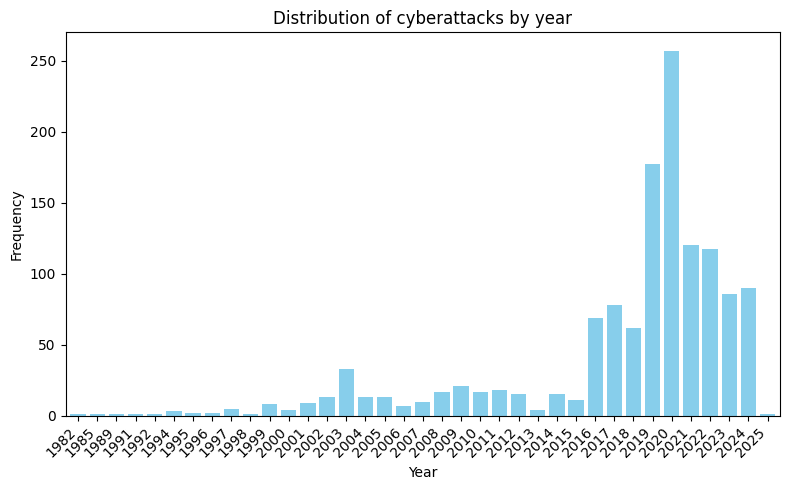

In [613]:
plt.figure(figsize=(8, 5))
df['year'].value_counts().sort_index().plot(kind='bar', color='skyblue', width=0.8)
plt.title('Distribution of cyberattacks by year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

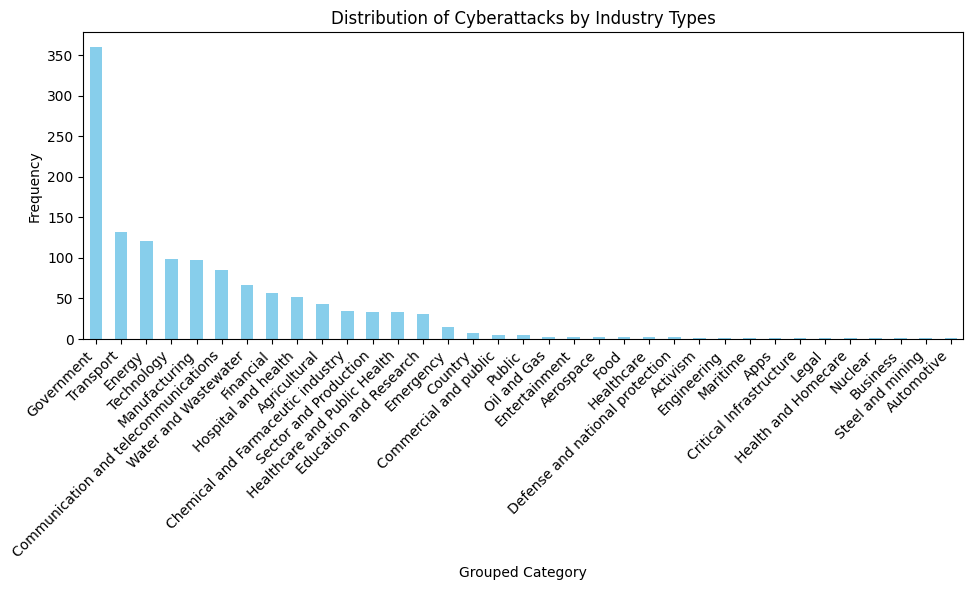

In [614]:
# Histograma 'subcategory'
plt.figure(figsize=(10, 6))
df['industry_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Cyberattacks by Industry Types')
plt.xlabel('Grouped Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

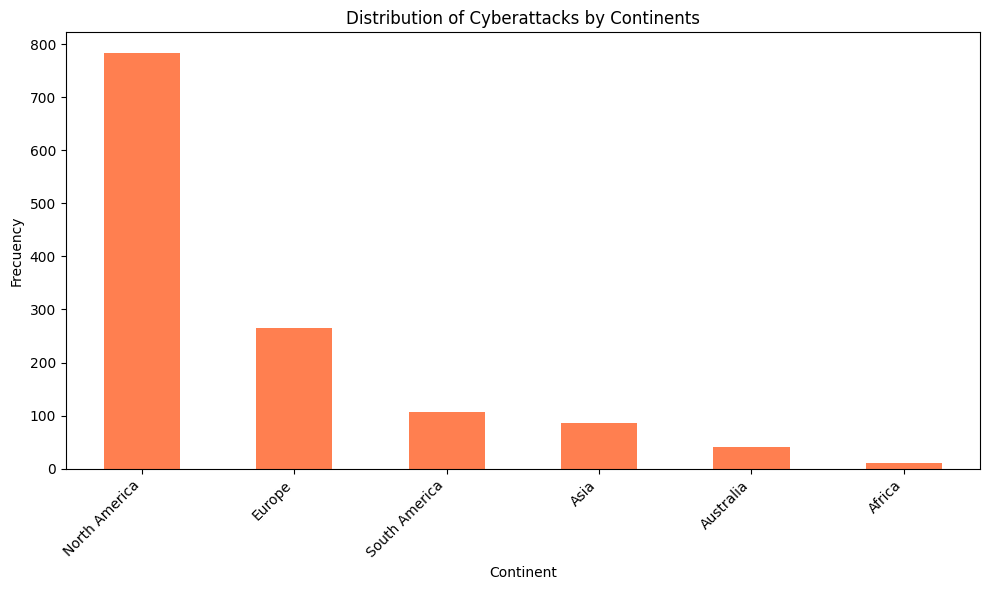

In [615]:
# Crear un histograma de la columna 'continent'
plt.figure(figsize=(10, 6))
df['continent'].value_counts().plot(kind='bar', color='coral')
plt.title('Distribution of Cyberattacks by Continents')
plt.xlabel('Continent')
plt.ylabel('Frecuency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Distribución de las variables continuas.
Para continuar con nuestro estudio, empezaremos evaluando las variables continuas que en nuestra lista han salido de tipo `object`.

Primeramente, evaluamos las variables de tipo objecto.

In [616]:
df[[col for col in v_continuas if df[col].dtype == 'object']].describe()

,attack_description,attack_details,impact,link_at_the_internet
count,1303,1303,723,1088
unique,1285,761,675,473
top,Tokio Marine suffers attack in Singapore,Ransomware Attack - Blocking or encrypting mac...,Data leakage,cisoadvisor.com.br
freq,2,542,11,65


#### Análisis de datos categóricos

1. **Distribución de datos categóricos**: 
   - La columna **`source_database`** tiene 5 valores únicos, con "TI Safe" como el más común, apareciendo 481 veces. Esto indica que la mayor parte de los datos proviene de esta fuente.
   - En **`attack_description`**, hay 751 valores únicos de un total de 757 filas, lo que sugiere que casi cada fila tiene una descripción única de ataque. Esto muestra la alta diversidad en los tipos de ataques registrados.
   - La columna **`country`** tiene 102 valores únicos, siendo "United States" el país más común, mencionado en 272 registros. Esto sugiere que muchos ataques documentados afectan o tienen relación con los Estados Unidos.
   
2. **Agrupación de datos**:
   - En la columna **`industry_type`**, hay 56 tipos de industrias únicas, pero el "Government facilities sector" es el más frecuente, apareciendo 86 veces. Esto puede indicar que este tipo de instalaciones gubernamentales son un objetivo común.
   - En **`subcategory`**, se observan 101 subcategorías, y "Transportation Systems" es la más común, con 82 menciones.
   
3. **Agrupaciones creadas**:
   - Para **`subcategory_agrupada`**, hay 11 categorías agrupadas, siendo "Salud y Servicios Públicos" la más común, con 118 registros.
   - La columna **`continente`** muestra que la mayor parte de los ataques registrados se concentran en **América**, con 402 menciones, lo que indica una gran cantidad de incidentes en este continente.
   - Finalmente, en **`subgrupo_industry`**, el grupo "Otros" es el más común, con 392 registros, lo que podría sugerir que varios sectores no encajan perfectamente en las categorías más específicas.


Finalmente en cuánto a variables categóricas realizaremos el estudio de las de tipo numérico, ya transformadas en dummies.

In [617]:
df[v_categoricas].describe()

,day,month,year
count,1303.000000,1303.000000,1303.000000
mean,12.366078,5.396009,2017.534152
std,8.740164,3.613176,6.289742
min,1.000000,1.000000,1982.000000
25%,5.000000,2.000000,2017.000000
50%,11.000000,5.000000,2020.000000
75%,19.000000,8.000000,2021.000000
max,31.000000,12.000000,2025.000000


##### Análisis de la Columna `ti_safe_score`

- **count**: 638  
  Indica que hay 638 observaciones válidas en la columna, lo que refleja la cantidad de datos disponibles para el análisis.

- **mean**: 3.58  
  La media es aproximadamente 3.58, lo que sugiere que, en general, las puntuaciones de seguridad son superiores a la mitad de la escala (0 a 5).

- **std**: 0.94  
  La desviación estándar es 0.94, lo que indica una variabilidad moderada en las puntuaciones. Esto sugiere que, aunque muchas puntuaciones están cerca de la media, hay algunas que se alejan significativamente.

- **min**: 0  
  La puntuación mínima es 0, indicando que existen registros con la puntuación más baja posible en la escala.

- **25%**: 3  
  El primer cuartil muestra que el 25% de las puntuaciones son menores a 3. Esto significa que una parte de los registros tiene puntuaciones relativamente bajas.

- **50%**: 4  
  La mediana es 4, lo que indica que el 50% de las puntuaciones están por debajo de este valor. Esto sugiere que la mitad de los registros tienen puntuaciones de seguridad relativamente altas.

- **75%**: 4  
  El tercer cuartil revela que el 75% de las puntuaciones son menores a 4, lo que implica que solo un 25% de los registros tienen puntuaciones superiores a este valor.

- **max**: 5  
  La puntuación máxima es 5, indicando que al menos un registro alcanzó la puntuación más alta en la escala.


En general, las puntuaciones de `ti_safe_score` tienden a ser altas, con una media de 3.58 y una mediana de 4, lo que refleja una percepción positiva de la seguridad en los registros analizados. La desviación estándar de 0.94 sugiere una variabilidad moderada, con muchas puntuaciones agrupadas en la parte superior de la escala. La presencia de puntuaciones tanto en el extremo inferior (0) como en el extremo superior (5) indica un rango completo de evaluación en esta variable.


### Variables dummies

In [618]:
df.head()

,day,month,year,attack_description,country,industry_type,subcategory,attack_details,ti_safe_score,impact,...,Emergency,Transportation,Legal,Oil and Gas,Apps,Aerospace,Maritime,Engineering,Manufacturing,Automotive
id,,,,,,,,,,,,,,,,,,,,,
1338,15,8,2025,A massive cyberattack disrupted Iran's Central...,Iran,Financial,Banking and Finance,The Central Bank of Iran suffered a major cybe...,4.0,"Severe disruptions in Iran's banking system, w...",...,0,0,0,0,0,0,0,0,0,0
1337,15,8,2024,"A previously unknown threat actor, dubbed Acto...",Azerbaijan and Israel,Public,"Gpver,emt","In July 2024, a newly identified threat actor,...",4.0,Compromise of sensitive diplomatic data throug...,...,0,0,0,0,0,0,0,0,0,0
1336,15,8,2024,The Iranian state-backed group APT42 launched ...,United States (and Israel),Public,Government and Elections,"Between February and late July 2024, APT42, a ...",4.0,Successful breaches of accounts across multipl...,...,0,0,0,0,0,0,0,0,0,0
1335,14,8,2024,The ThreeAM ransomware targeted Kootenai Healt...,United States,Health and Homecare,Healthcare,"The ThreeAM ransomware attack, which began on ...",4.0,"Personal and medical data of 464,000 patients ...",...,0,0,0,0,0,0,0,0,0,0
1334,14,8,2024,The Brain Cipher ransomware group crippled Ind...,Indonesia,Government,Public Administration,Brain Cipher ransomware group targeted Indones...,4.0,Severe disruptions to government services and ...,...,0,0,0,0,0,0,0,0,0,0


### Limpieza de datos anómalos

### Modelos de clasificación.

Para la realización de los modelos de clasificación, deberemos de utilizar las columnas numéricas. Estas columnas se utilizarán como características para entrenar los modelos, permitiendo que estos aprendan patrones en los datos.

Este proceso tiene como objetivo comprobar la limpieza de los datos y garantizar que la información sea adecuada para el análisis posterior.

In [619]:
# Ver los tipos de datos del DataFrame
df.dtypes

# Hacer una copia del DataFrame original
df_1 = df.copy()

from sklearn.preprocessing import LabelEncoder

# Inicializar el LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a la columna 'industry_type'
df_1['industry_type'] = label_encoder.fit_transform(df_1['industry_type'])
df_1['subcategory'] = label_encoder.fit_transform(df_1['subcategory'])

# Eliminar las columnas de tipo object, pero dejando la columna 'industry_type'
# que ya ha sido transformada a numérica
df_1 = df_1.drop(list(df_1.select_dtypes(include=['object']).columns), axis=1)

# Verificar si 'industry_type' sigue en df_1
df_1.head()                         


,day,month,year,industry_type,subcategory,ti_safe_score,North America,South America,Europe,Asia,...,Emergency,Transportation,Legal,Oil and Gas,Apps,Aerospace,Maritime,Engineering,Manufacturing,Automotive
id,,,,,,,,,,,,,,,,,,,,,
1338,15,8,2025,17,7,4.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1337,15,8,2024,29,40,4.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1336,15,8,2024,29,38,4.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1335,14,8,2024,20,47,4.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1334,14,8,2024,19,78,4.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [620]:
# Lista de columnas a verificar
columns_to_check = [
    'Financial', 'Public', 'Health and Homecare', 'Government', 'Technology',
    'Critical Infrastructure', 'Healthcare', 'Communication and telecommunications', 
    'Nuclear', 'Energy', 'Transport', 'Entertainment', 'Business', 
    'Healthcare and Public Health', 'Hospital and health', 'Steel and mining', 
    'Activism', 'Country', 'Food', 'Manufacturing', 'Water and Wastewater', 
    'Commercial and public', 'Education and Research', 'Sector and Production', 
    'Chemical and Farmaceutic industry', 'Agricultural', 'Defense and national protection', 
    'Emergency', 'Legal', 'Oil and Gas', 'Apps', 'Aerospace', 'Maritime', 
    'Engineering', 'Automotive'
]

# Contar las filas que tienen todo cero en las columnas especificadas
zero_rows_count = df_1[columns_to_check].sum(axis=1).eq(0).sum()

print(f"Number of rows with all zeros in the specified columns: {zero_rows_count}")

Number of rows with all zeros in the specified columns: 121


In [621]:
df_1.columns

Index(['day', 'month', 'year', 'industry_type', 'subcategory', 'ti_safe_score',
       'North America', 'South America', 'Europe', 'Asia', 'Africa',
       'Australia', 'Financial', 'Public', 'Health and Homecare', 'Government',
       'Technology', 'Critical Infrastructure', 'Healthcare',
       'Communication and telecommunications', 'Nuclear', 'Energy',
       'Transport', 'Media', 'Entertainment', 'Business',
       'Healthcare and Public Health', 'Hospital and health',
       'Steel and mining', 'Activism', 'Country', 'Food',
       'Manufacturing and automation', 'Water and Wastewater',
       'Commercial and public', 'Information Technology',
       'Education and Research', 'Sector and Production',
       'Chemical and Farmaceutic industry', 'Agricultural',
       'Defense and national protection', 'Emergency', 'Transportation',
       'Legal', 'Oil and Gas', 'Apps', 'Aerospace', 'Maritime', 'Engineering',
       'Manufacturing', 'Automotive'],
      dtype='object')

#### LImpieza de datos anómalos

In [622]:
df_1.shape

(1303, 51)

In [623]:
columns_to_check = ['industry_type', 'subcategory']  

Q1 = df_1[columns_to_check].quantile(0.10)
Q3 = df_1[columns_to_check].quantile(0.90)


IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_1 = df_1[~((df_1[columns_to_check] < lower_bound) | (df_1[columns_to_check] > upper_bound)).any(axis=1)]

print("Tamaño del DataFrame original:", df_1.shape)
print("Tamaño del DataFrame después de eliminar outliers:", df_1.shape)

Tamaño del DataFrame original: (1303, 51)
Tamaño del DataFrame después de eliminar outliers: (1303, 51)


In [624]:
X = df_1.drop('industry_type', axis=1)  
y = df_1['industry_type']

In [625]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1042, 50)
(261, 50)


In [626]:
# Definir la función para encontrar el mejor modelo
def mejor_modelo(X, y, modelos):
    resultados = {}
    for nombre, modelo in modelos.items():
        if nombre == 'Regresión Logística':
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)  # Escalar solo si es Regresión Logística
            scores = cross_val_score(modelo, X_scaled, y, cv=5, scoring='accuracy')
        else:
            scores = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')
        resultados[nombre] = scores.mean()

    mejor = max(resultados, key=resultados.get)
    return mejor, resultados

# Definir los modelos que deseas evaluar
modelos = {
    'Random Forest': RandomForestClassifier(),
    'Regresión Logística': LogisticRegression(max_iter=1000),
    'Árbol de Decisión': DecisionTreeClassifier()
}

# Obtener el mejor modelo y sus resultados
mejor, resultados = mejor_modelo(X_train, y_train, modelos)

# Imprimir los resultados
print("Resultados de los modelos:")
for modelo, score in resultados.items():
    print(f"{modelo}: {score:.4f}")

print(f"\nEl mejor modelo es: {mejor}")


c:\Users\Claudia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Claudia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Resultados de los modelos:
Random Forest: 0.7927
Regresión Logística: 0.7706
Árbol de Decisión: 0.7783

El mejor modelo es: Random Forest


c:\Users\Claudia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


### Matriz de correlación

La matriz de correlación es una herramienta estadística que ilustra la relación entre varias variables en un conjunto de datos. Cada celda de la matriz refleja el coeficiente de correlación entre dos variables, que puede oscilar entre -1 y 1. Cuanto más cerca esté el valor absoluto de 1, mayor será la relación entre las variables.

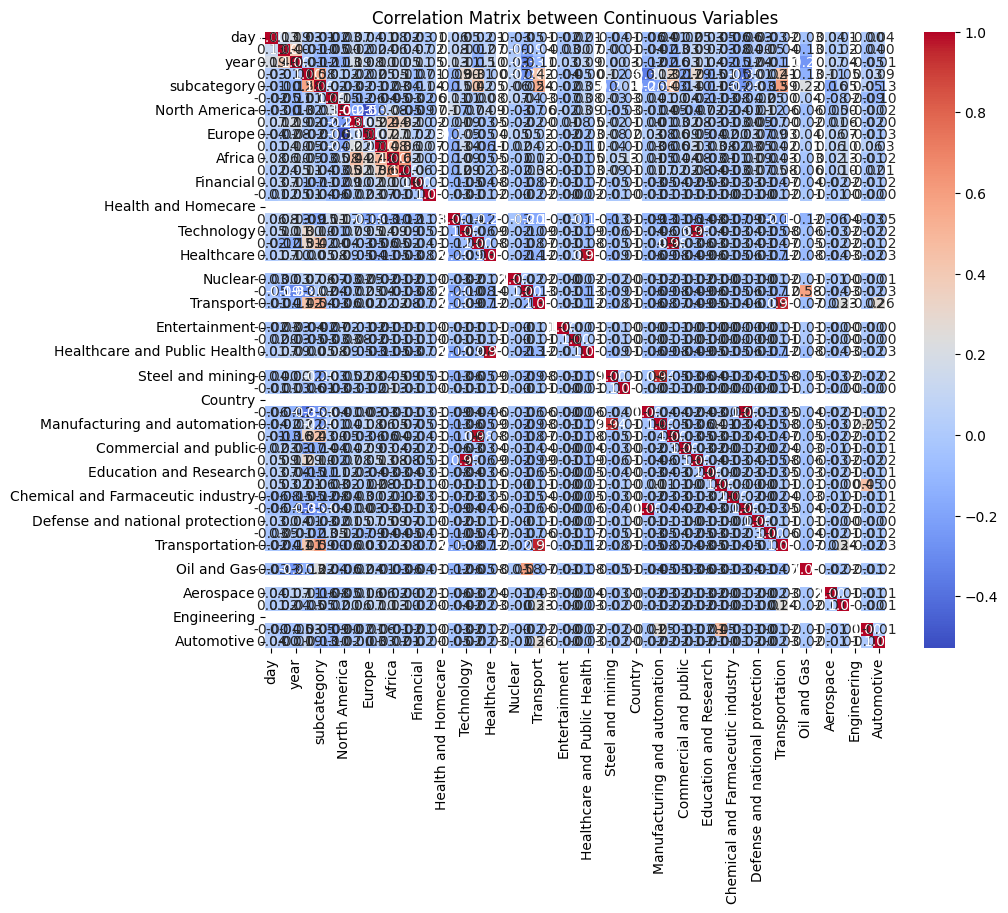

In [627]:
correlation_matrix = df_1.corr()

# Configurar el tamaño de la figura y generar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Título de la gráfica
plt.title('Correlation Matrix between Continuous Variables')
plt.show()